<a href="https://colab.research.google.com/github/Aryyahhh/MAIN-PROJECT/blob/main/PROJECT_NO_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.cluster import KMeans
import tensorflow as tf
import seaborn as sns

from google.colab import files
data=files.upload()

Saving NSL-KDD.csv to NSL-KDD.csv


In [ ]:
column_names = [
'protocol','flow_duration','total_forward_packets','total_backward_packets',
  'total_forward_packets_length','total_backward_packets_length',
'forward_packet_length_mean','backward_packet_length_mean','forward_packets_per_second',
'backward_packets_per_second','forward_iat_mean','backward_iat_mean','flow_iat_mean',
'flow_packets_per_seconds','flow_bytes_per_seconds','label'
]


In [ ]:
df = pd.read_csv("NSL-KDD.csv")
df = df.drop_duplicates()

In [ ]:
for col in column_names[:-1]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
for col in df.columns[:-1]:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())

In [ ]:
X = df.drop("label", axis=1)
y = df["label"]


In [ ]:
y = y.apply(lambda x: 0 if x == 'normal' else 1)

In [ ]:
categorical_features = ['protocol_type', 'service', 'flag']

In [ ]:
for col in categorical_features:
    if col in X.columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)



In [ ]:
model.save("tf_model.keras")


In [ ]:
y_prob = model.predict(X_test).ravel()
y_pred = (y_prob > 0.5).astype(int)

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: nan


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


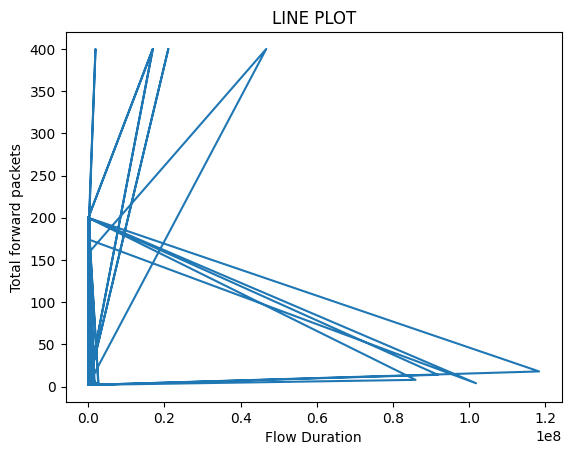

In [ ]:
plt.plot(df['flow_duration'],df['total_forward_packets'])
plt.title("LINE PLOT")
plt.xlabel("Flow Duration")
plt.ylabel("Total forward packets")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
df["cluster"] = kmeans.fit_predict(X)

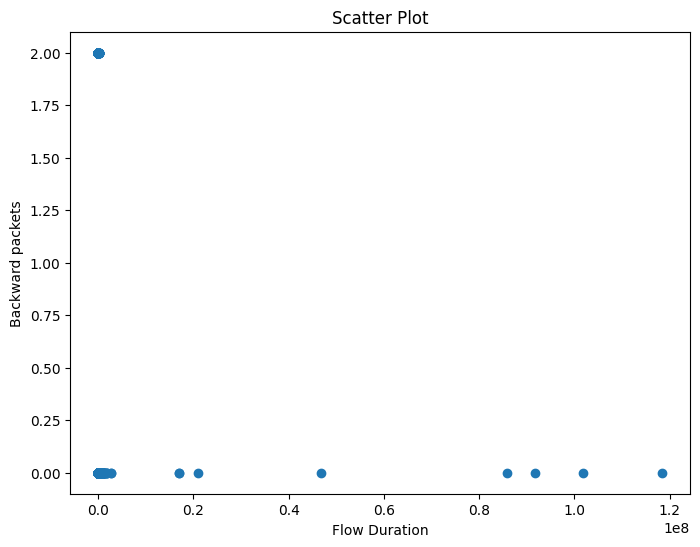

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['flow_duration'],df['total_backward_packets'])
plt.title('Scatter Plot')
plt.xlabel('Flow Duration')
plt.ylabel('Backward packets')
plt.show()

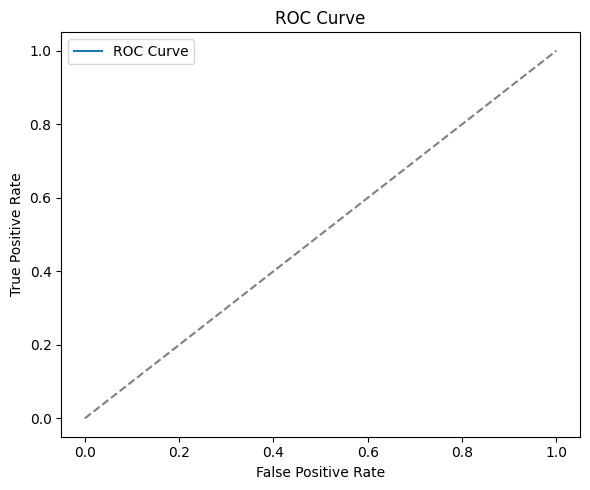

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()


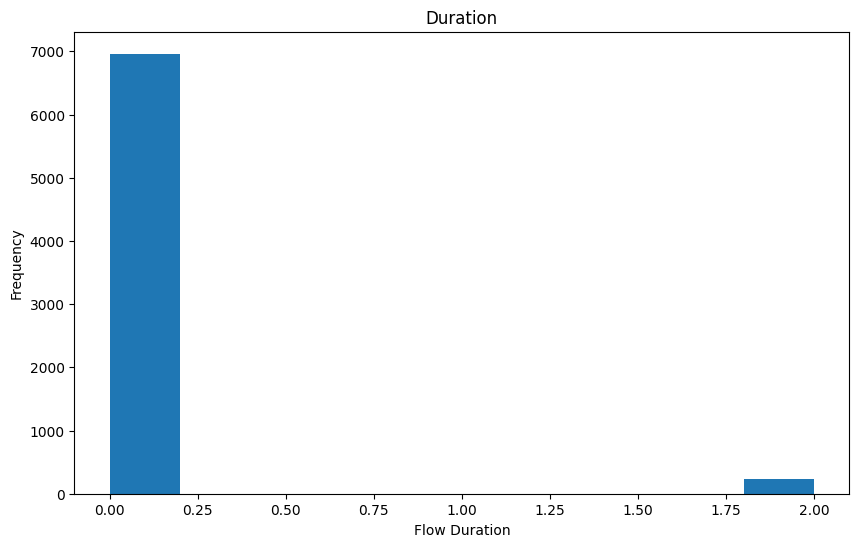

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['total_backward_packets'])
plt.title('Duration')
plt.xlabel('Flow Duration')
plt.ylabel('Frequency')
plt.show()

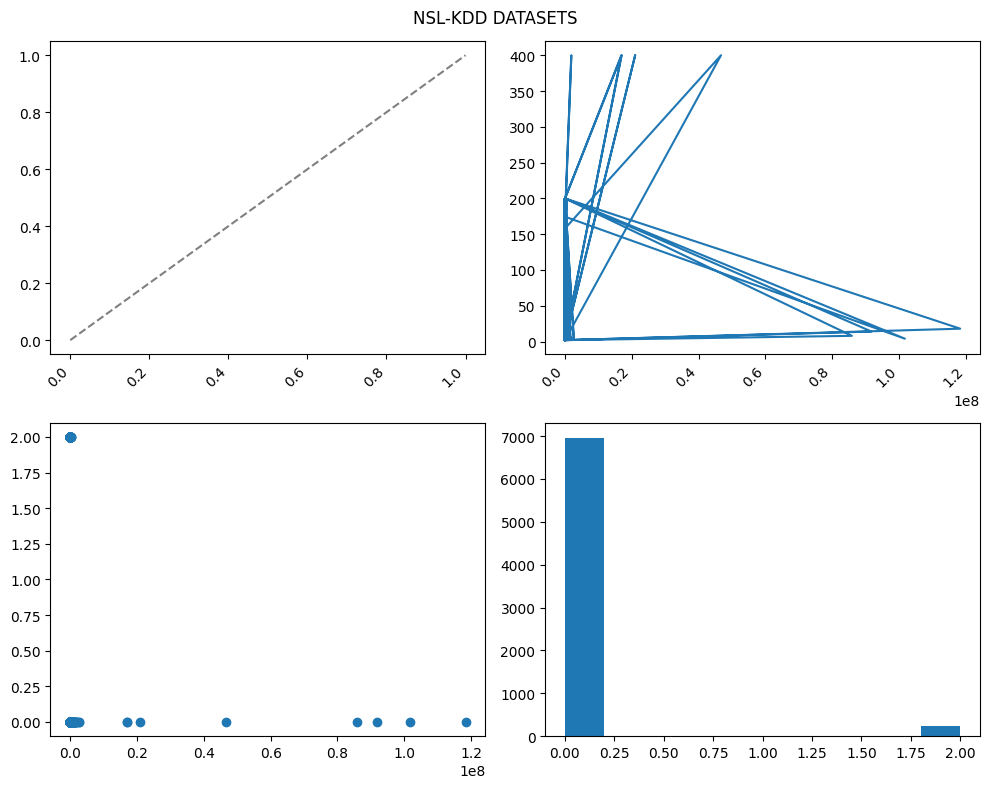

In [ ]:
plt.figure(figsize=(10,8))
plt.suptitle("NSL-KDD DATASETS")
plt.subplot(2,2,1)
plt.plot(fpr, tpr, label=f"ROC Curve")
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplot(2,2,2)
plt.plot(df['flow_duration'],df['total_forward_packets'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplot(2,2,3)
plt.scatter(df['flow_duration'],df['total_backward_packets'])
plt.subplot(2,2,4)
plt.hist(df['total_backward_packets'])
plt.tight_layout()

plt.savefig('dashboard.png')
plt.show()